# EDA

Perform EDA on cleaned datasets. Discoveries during EDA of additional data cleaning steps will be added to notebook 3 and the cleaned csv will be re-exported and re-imported.

In [35]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('data/posts_01_cleaned_sample.csv')

In [36]:
df.head()

,comments,body,createdatformatted,creator,datatype,depth,depthraw,followers,following,hashtags,...,preview,reposts,state,parent,commentdepth,controversy,downvotes,post,score,isprimary
0,0,Possibly........ •Chynaa. •Soros. •Globalists...,2020-09-01 18:05:07 UTC,e0ccf0acef0a43fa9ea7a447debdc781,comments,2.0,2.0,701.0,525.0,[],...,NaN,NaN,NaN,692baa94e4c845df829fa5b333a0e61b,1.0,0.0,0.0,19a9db6ce1c040f1accff10028d90cb8,0.0,0.0
1,0,Right!,2020-07-24 20:58:59 UTC,781e9ee94ab242f294627d69ee1e74ac,comments,1.0,1.0,10.0,12.0,[],...,NaN,NaN,NaN,77528f6960b34bb691405135b27f9782,0.0,0.0,0.0,77528f6960b34bb691405135b27f9782,0.0,1.0
2,0,Cuomo is an egotistical asshole. His day is co...,2020-11-29 16:25:55 UTC,9c46ba5cdb7445b28d1e301ad873bb75,comments,1.0,1.0,3100.0,5700.0,[],...,NaN,NaN,NaN,7c187094ac5c4ed2a408d6288f923b4e,0.0,0.0,0.0,7c187094ac5c4ed2a408d6288f923b4e,1.0,1.0
3,-1,Yuppers the judge in the Flynn case ! Hummmmm ...,2020-08-22 02:38:59 UTC,caedb6d31bf14d43a13e62cfdd5e97d8,comments,1.0,1.0,3200.0,114.0,[],...,NaN,NaN,NaN,c5d84fd2f80a42aba05f56b9ead51fbf,0.0,0.0,0.0,c5d84fd2f80a42aba05f56b9ead51fbf,0.0,1.0
4,0,I see tiny devil horns coming out of his head....,2020-11-18 01:44:08 UTC,858740abb78b4bcd8526d39062d91c30,comments,1.0,1.0,13.0,8.0,[],...,NaN,NaN,NaN,c87a4f688aea4c60922eb38fbd888790,0.0,0.0,0.0,c87a4f688aea4c60922eb38fbd888790,6.0,1.0


In [37]:
numeric_cols = list(df.select_dtypes(include='number'))
print(numeric_cols)

['comments', 'depth', 'depthraw', 'followers', 'following', 'media', 'posts', 'sensitive', 'upvotes', 'verified', 'article', 'impressions', 'reposts', 'state', 'commentdepth', 'controversy', 'downvotes', 'score', 'isprimary']


In [39]:
for i in numeric_cols:
    print(i)
    print(df[i].value_counts())
    print()

comments
 0      52529
-1      22544
 1       8991
 2       1888
 3        687
        ...  
 489        1
 100        1
 270        1
 74         1
 169        1
Name: comments, Length: 82, dtype: int64

depth
1.0      50227
2.0      17410
0.0      11167
3.0       4728
4.0       1745
         ...  
142.0        1
83.0         1
56.0         1
593.0        1
634.0        1
Name: depth, Length: 78, dtype: int64

depthraw
1.0      50227
2.0      17410
0.0      11167
3.0       4728
4.0       1745
         ...  
142.0        1
83.0         1
56.0         1
593.0        1
634.0        1
Name: depthraw, Length: 78, dtype: int64

followers
1100.0      1208
1300.0      1096
1400.0      1093
1200.0      1088
1500.0       860
            ... 
130000.0       1
342000.0       1
726000.0       1
301000.0       1
80000.0        1
Name: followers, Length: 1233, dtype: int64

following
1100.0      937
1200.0      864
1300.0      769
1400.0      725
1500.0      655
           ... 
85000.0       1
66000

In [42]:
creator_df = df[['body', 'username']]
creator_df.head(3)

,body,username
0,Possibly........ •Chynaa. •Soros. •Globalists...,Dd061973
1,Right!,AlisonHMcvay
2,Cuomo is an egotistical asshole. His day is co...,Mlaster206


<AxesSubplot:>

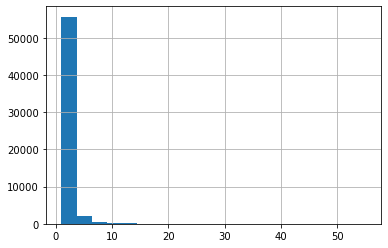

In [45]:
creator_df['username'].value_counts().hist(bins=20) #/len(creator_df)*100

In [46]:
num_posts = pd.DataFrame(creator_df['username'].value_counts())
num_posts

,username
Gayle7753,55
LibertyElaine,54
doutingthomas1,50
Klonokid,49
jenniev101,48
...,...
Shilohbloo,1
MagaMike1,1
PTDoctor83,1
KendraWard,1


In [48]:
num_posts[num_posts['username'] > 30]

,username
Gayle7753,55
LibertyElaine,54
doutingthomas1,50
Klonokid,49
jenniev101,48
chucknellis,43
Mikewin,43
Cobrarick98,41
Oldmanrant,40
ThomasFox,39


## Timeline

In [56]:
df['createdatformatted'].sort_values()

62391    2017-10-05 12:49:03 UTC
79168    2017-11-12 21:23:58 UTC
30461    2017-11-13 01:15:00 UTC
11569    2018-01-10 06:05:42 UTC
63083    2018-03-09 19:40:35 UTC
                  ...           
37712    2021-01-11 02:35:55 UTC
42731    2021-01-11 03:35:05 UTC
46019    2021-01-11 03:57:11 UTC
45132    2021-01-11 05:22:21 UTC
14106    2021-01-11 05:51:38 UTC
Name: createdatformatted, Length: 87788, dtype: object

In [60]:
df['createdatformatted'] = pd.to_datetime(df['createdatformatted'])

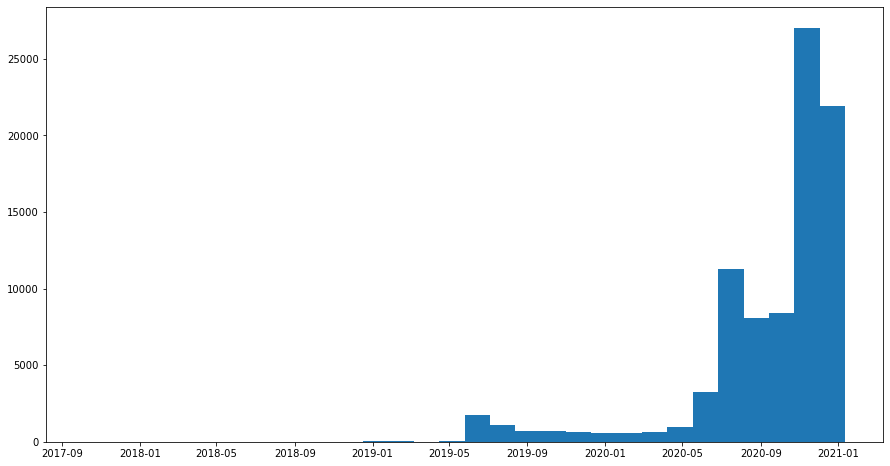

In [64]:
plt.figure(figsize=(15, 8))
plt.hist(df['createdatformatted'], bins=30);